#  Question 3 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt

In this exercise we will solve Burger's equation, given by

\begin{equation}
\frac{\partial u}{\partial t} + \epsilon \frac{\partial}{\partial t}\Big(\frac{u^2}{2}\Big) = 0.
\end{equation}

This equation is like a wave propagation equation in which the phase speed of the wave $v$ is replaced by the actual wave velocity $u$. This nonlinearity allows the wave to steepen and so is one way to model water waves approaching a beach. We will solve his equation with an extension of the leapfrog method. The method is as follows:

\begin{equation}
\frac{u(x,t+h)-u(x,t-h)}{2h} = - \frac{\epsilon}{2} \frac{u(x+a,t)^2-u(x-a,t)^2}{2a},
\end{equation}

or rearranging to get an equation which we can iterate through time,

\begin{align}
u(x,t+h) &= u(x,t-h) - \frac{\beta}{2}\big[u(x+a,t)^2-u(x-a,t)^2 \big], & \text{with} \;\;\;\; \beta &= \epsilon \frac{h}{a}
\end{align}

We combine this with a single Euler step at the very begining, and now have everything we need to solve the equation.


\begin{align}
u(h) &= u(0) + \tfrac{1}{2}hu'(0), & \text{where} \;\;\;\; u(0) &= \sin(x), \;\;\;\; u'(0) = - \epsilon \cos(x).
\end{align}

We then continue at $u(2h)$ and onwards using the equation we derived based on the leapfrog method. We implement this code below. $\bf{NOTE}$: The lab manual tells us to specify $\Delta x \equiv a$, and use it along with length $L$ to define $N$, the total number of divisions in our x grid. This is a poor way of doing things because $L$ is irrational, and hence $N$ will also be irrational, which leads to rounding errors as we define our $x$ array to an integer length. I therefore choose to knowingly ignore the lab manual and instead specify $N$ directly, in turn using it to define $\Delta x \equiv a$.

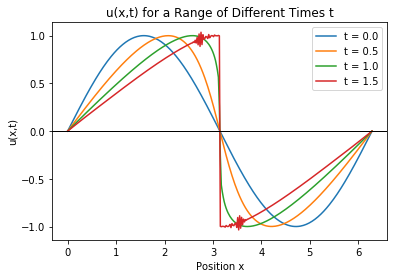

In [2]:
# Constants
eps = 1      # epsilon
h = 0.005    # Time-step
L = 2*np.pi  # Length of x grid
N = 315      # Number of x points (taken s.t. a~0.02)
a = L/N      # Spacing between x points
b = eps*h/a  # beta
Tf = 2       # Final time

# Create arrays
x = np.linspace(0,L,N+1)    # grid of positions
u = np.sin(x)  # initialize u(x,t=0)
u[0] = 0.  # boundary conditions (just in case)
u[-1] = 0.

plt.plot(x,u, label = 't = 0.0') # plot initial t

######### Begin solving equation according to equations above ########
u_half = u - 0.5*h*u*eps*np.cos(x) # first Euler step
u_min = np.copy(u) # define first u(t-h), labelled u_min
t = h # set current time
while t < Tf: # loop until t = Tf s
    # calculate next u (u(t+h))
    u[1:N] = u_min[1:N] -0.5*b*(u_half[2:N+1]**2 - u_half[0:N-1]**2)
    # Next u_min (t-h) is current u_half (t), Next u_half (t) is current u (t+h)
    u_min, u_half = np.copy(u_half), np.copy(u)
    
    # plot result for certain times
    if abs(t-0.5)<1e-3: plt.plot(x,u, label = 't = 0.5')
    elif abs(t-1.0)<1e-3: plt.plot(x,u, label = 't = 1.0')
    elif abs(t-1.5)<1e-3: plt.plot(x,u, label = 't = 1.5')
    
    t += h # increment time

plt.legend()
plt.axhline(y=0, color='black', linewidth=1)
plt.title('u(x,t) for a Range of Different Times t')
plt.ylabel('u(x,t)')
plt.xlabel('Position x')
plt.show()

We find that the code works well in solving the equation up until $\sim 1.5$s. At this point, the original disturbance, which had a right moving wave on the left, and a left moving wave on the right, collides with itself in the centre. This particular code method is clearly unable to handle the two waves going through each other, and instead produces a very steep discontinuity between the two fronts. As the discontinuity grows, artificats can be seen on either side, which eventually grow and propagate down the wave. If we wanted to properly handle two waves colliding, we would likely either need a much better method (instead of the crude leapfrog), or include some shock capturing to prevent the formation of sharp discontinuities.

Also Note: The structure of our artifact changes depending on whether Nx is even or odd - interesting! (Try it yourself - change $N$ to 316 instead of 315)